In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
workingArea = pd.read_excel('tmp.xlsx')

In [7]:
t = 24 + 273

workingArea['T'] = (workingArea.Term - workingArea.Term[0])/1000/(0.000001*41) + t

In [9]:
workingArea['1/T'] = 1/workingArea['T']

In [43]:
workingArea['ln'] = np.log(10*workingArea['R, om'])

In [44]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

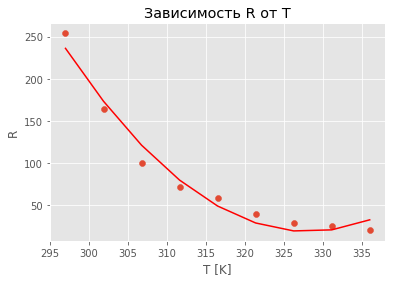

In [78]:
p = np.polyfit(workingArea['T'], workingArea['R, om'], 2)
yp = np.polyval(p, workingArea['T'][::-1])
text = "y= "+str(toFixed(p[0], 4))+"*x  " + str(toFixed(p[1], 2))

plt.scatter(workingArea['T'], workingArea['R, om'])
plt.plot(workingArea['T'][::-1], yp, 'r', label='Approx')
#plt.text(0.00295, 7, text)
#plt.xlim(0.0029, 0.0034)
plt.title('Зависимость R от T')
plt.xlabel(u'T [K]')
plt.ylabel(u'R')
plt.savefig('T R.png', format='png', dpi=500)

In [79]:
p = np.polyfit(workingArea['1/T'], workingArea['ln'], 1)
yp = np.polyval(p, workingArea['1/T'])
text = "y= "+str(toFixed(p[0], 4))+"*x  " + str(toFixed(p[1], 2))

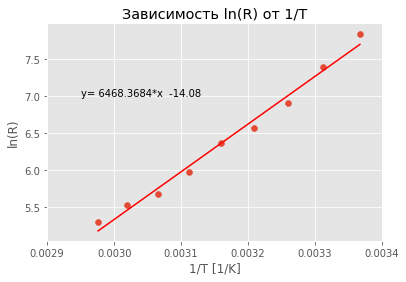

In [81]:
plt.style.use('ggplot')
plt.scatter(workingArea['1/T'], workingArea['ln'])
plt.plot(workingArea['1/T'], yp, 'r', label='Approx')
plt.text(0.00295, 7, text)
plt.xlim(0.0029, 0.0034)
plt.title('Зависимость ln(R) от 1/T')
plt.xlabel(u'1/T [1/K]')
plt.ylabel(u'ln(R)')
plt.savefig('ln.png', format='png', dpi=500)

In [82]:
deltaV = p[0]*8.617*10**(-5)

In [83]:
deltaV

0.5573793072449916

In [49]:
p[0]

6468.368425728113

In [50]:
workingArea

,Term,"R, om",T,1/T,ln
0,0.08,254,297.000000,0.003367,7.839919
1,0.28,164,301.878049,0.003313,7.402452
2,0.48,100,306.756098,0.003260,6.907755
3,0.68,71,311.634146,0.003209,6.565265
4,0.88,58,316.512195,0.003159,6.363028
5,1.08,39,321.390244,0.003111,5.966147
6,1.28,29,326.268293,0.003065,5.669881
7,1.48,25,331.146341,0.003020,5.521461
8,1.68,20,336.024390,0.002976,5.298317
